<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,236.031204,321.413731,173.256462,148.157269
1,0.0,1.0,51.481689,45.456425,-1726.175383,-1619.237268,120.998031,-1740.235299
2,0.0,2.0,56.171223,44.358325,-382.298093,-271.768545,138.211733,-409.980278
3,0.0,3.0,21.954529,40.768202,545.732441,618.455172,52.454779,566.000393
4,0.0,4.0,27.603475,78.106419,-3796.630718,-3680.920825,-59.567454,-3621.353371
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-1024.821271,-873.499897,229.952630,-1103.452527
249996,999.0,246.0,54.304775,51.817653,-1126.437228,-1010.314799,35.091137,-1045.405936
249997,999.0,247.0,95.594189,46.358813,-1074.289007,-922.336005,409.189363,-1331.525369
249998,999.0,248.0,46.876454,80.830455,-5354.993837,-5217.286927,-347.033306,-4870.253621


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,236.031204,321.413731,173.256462,148.157269
1,0.0,1.0,51.481689,45.456425,-1726.175383,-1619.237268,120.998031,-1740.235299
2,0.0,2.0,56.171223,44.358325,-382.298093,-271.768545,138.211733,-409.980278
3,0.0,3.0,21.954529,40.768202,545.732441,618.455172,52.454779,566.000393
4,0.0,4.0,27.603475,78.106419,-3796.630718,-3680.920825,-59.567454,-3621.353371
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-1024.821271,-873.499897,229.952630,-1103.452527
249996,999.0,246.0,54.304775,51.817653,-1126.437228,-1010.314799,35.091137,-1045.405936
249997,999.0,247.0,95.594189,46.358813,-1074.289007,-922.336005,409.189363,-1331.525369
249998,999.0,248.0,46.876454,80.830455,-5354.993837,-5217.286927,-347.033306,-4870.253621


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    48.027802  27.354725   236.031204   321.413731  173.256462   
      1.0    51.481689  45.456425 -1726.175383 -1619.237268  120.998031   
      2.0    56.171223  44.358325  -382.298093  -271.768545  138.211733   
      3.0    21.954529  40.768202   545.732441   618.455172   52.454779   
      4.0    27.603475  78.106419 -3796.630718 -3680.920825  -59.567454   
...                ...        ...          ...          ...         ...   
999.0 245.0  85.686563  55.634811 -1024.821271  -873.499897  229.952630   
      246.0  54.304775  51.817653 -1126.437228 -1010.314799   35.091137   
      247.0  95.594189  46.358813 -1074.289007  -922.336005  409.189363   
      248.0  46.876454  80.830455 -5354.993837 -5217.286927 -347.033306   
      249.0  24.753935  29.894343   873.054714   937.702993   57.455407   

                   e_hat  
rep   index               
0.0   0.0     148.157269  
      1.0   -1740.235299  
      2.0    -409.980278  
      3.0     566.000393  
      4.0   -3621.353371  
...                  ...  
999.0 245.0 -1103.452527  
      246.0 -1045.405936  
      247.0 -1331.525369  
      248.0 -4870.253621  
      249.0   880.247586  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    48.027802  27.354725   236.031204   321.413731  173.256462   
      1.0    51.481689  45.456425 -1726.175383 -1619.237268  120.998031   
      2.0    56.171223  44.358325  -382.298093  -271.768545  138.211733   
      3.0    21.954529  40.768202   545.732441   618.455172   52.454779   
      4.0    27.603475  78.106419 -3796.630718 -3680.920825  -59.567454   
...                ...        ...          ...          ...         ...   
999.0 245.0  85.686563  55.634811 -1024.821271  -873.499897  229.952630   
      246.0  54.304775  51.817653 -1126.437228 -1010.314799   35.091137   
      247.0  95.594189  46.358813 -1074.289007  -922.336005  409.189363   
      248.0  46.876454  80.830455 -5354.993837 -5217.286927 -347.033306   
      249.0  24.753935  29.894343   873.054714   937.702993   57.455407   

                   e_hat  
rep   index               
0.0   0.0     148.157269  
      1.0   -1740.235299  
      2.0    -409.980278  
      3.0     566.000393  
      4.0   -3621.353371  
...                  ...  
999.0 245.0 -1103.452527  
      246.0 -1045.405936  
      247.0 -1331.525369  
      248.0 -4870.253621  
      249.0   880.247586  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.027802,27.354725,236.031204,321.413731,173.256462,148.157269
1,0.0,1.0,51.481689,45.456425,-1726.175383,-1619.237268,120.998031,-1740.235299
2,0.0,2.0,56.171223,44.358325,-382.298093,-271.768545,138.211733,-409.980278
3,0.0,3.0,21.954529,40.768202,545.732441,618.455172,52.454779,566.000393
4,0.0,4.0,27.603475,78.106419,-3796.630718,-3680.920825,-59.567454,-3621.353371
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.686563,55.634811,-1024.821271,-873.499897,229.952630,-1103.452527
249996,999.0,246.0,54.304775,51.817653,-1126.437228,-1010.314799,35.091137,-1045.405936
249997,999.0,247.0,95.594189,46.358813,-1074.289007,-922.336005,409.189363,-1331.525369
249998,999.0,248.0,46.876454,80.830455,-5354.993837,-5217.286927,-347.033306,-4870.253621


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    48.027802  27.354725   236.031204   321.413731  173.256462   
      1.0    51.481689  45.456425 -1726.175383 -1619.237268  120.998031   
      2.0    56.171223  44.358325  -382.298093  -271.768545  138.211733   
      3.0    21.954529  40.768202   545.732441   618.455172   52.454779   
      4.0    27.603475  78.106419 -3796.630718 -3680.920825  -59.567454   
...                ...        ...          ...          ...         ...   
999.0 245.0  85.686563  55.634811 -1024.821271  -873.499897  229.952630   
      246.0  54.304775  51.817653 -1126.437228 -1010.314799   35.091137   
      247.0  95.594189  46.358813 -1074.289007  -922.336005  409.189363   
      248.0  46.876454  80.830455 -5354.993837 -5217.286927 -347.033306   
      249.0  24.753935  29.894343   873.054714   937.702993   57.455407   

                   e_hat  
rep   index               
0.0   0.0     148.157269  
      1.0   -1740.235299  
      2.0    -409.980278  
      3.0     566.000393  
      4.0   -3621.353371  
...                  ...  
999.0 245.0 -1103.452527  
      246.0 -1045.405936  
      247.0 -1331.525369  
      248.0 -4870.253621  
      249.0   880.247586  

[250000 rows x 6 columns]

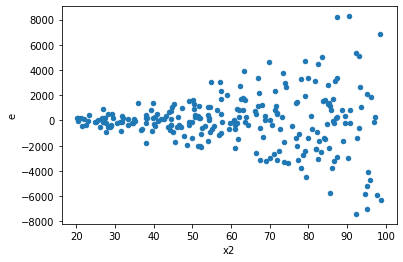

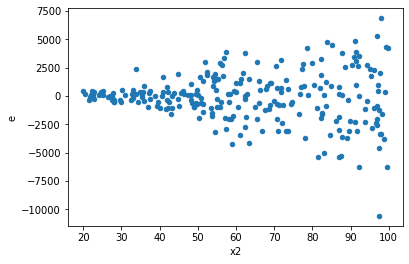

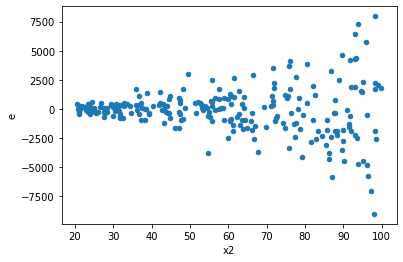

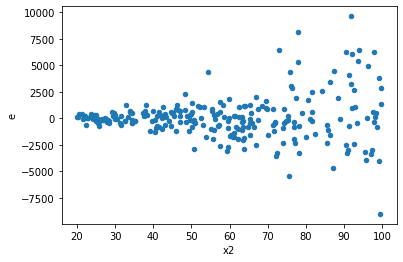

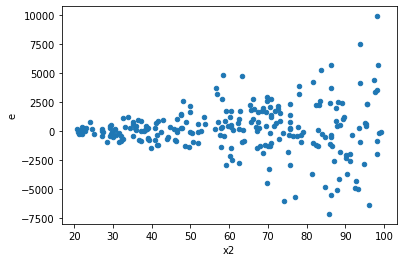

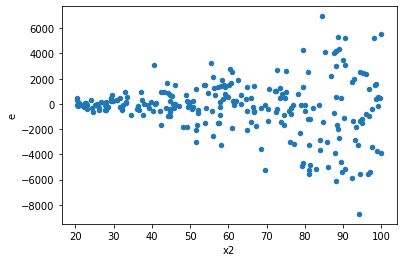

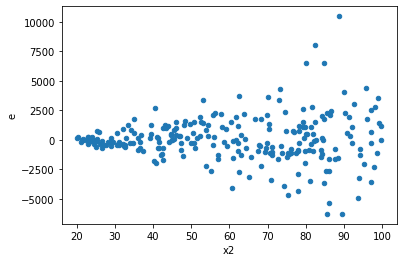

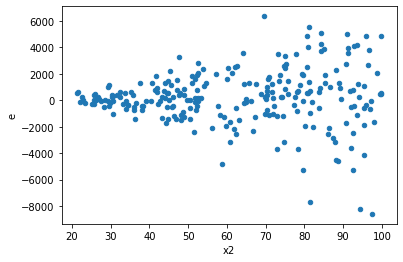

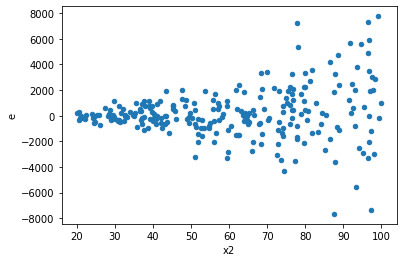

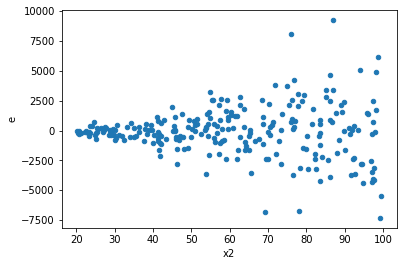

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,56997712.59400612,987519323.05409,581609.3121837359,10076727.786266224,17.32559567939464,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,87467517.57548808,909459000.2240355,892525.6895457967,9280193.879837098,10.397677051245166,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,35329686.7719923,904444958.4178262,360507.0078774725,9229030.187937003,25.60014087458107,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,35206666.28899801,905643636.7787865,359251.6968265103,9241261.599783536,25.723640782819526,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,68388436.72086921,902766918.4396381,697841.1910292776,9211907.331016716,13.200578368596522,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,63719192.58539252,1002797568.272396,650195.842708087,10232628.24767751,15.737763263847212,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,58159634.61851177,748674075.9220768,593465.6593725691,7639531.386959967,12.872743799593602,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,82605878.99897254,826202314.5645251,842917.1326425769,8430635.862903317,10.00173746198865,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,55165496.63734558,787908981.7710153,562913.2309933222,8039887.569091992,14.282640958544762,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,56997712.59400612,987519323.05409,581609.3121837359,10076727.786266224,17.32559567939464,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,87467517.57548808,909459000.2240355,892525.6895457967,9280193.879837098,10.397677051245166,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,35329686.7719923,904444958.4178262,360507.0078774725,9229030.187937003,25.60014087458107,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,35206666.28899801,905643636.7787865,359251.6968265103,9241261.599783536,25.723640782819526,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,68388436.72086921,902766918.4396381,697841.1910292776,9211907.331016716,13.200578368596522,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,63719192.58539252,1002797568.272396,650195.842708087,10232628.24767751,15.737763263847212,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,58159634.61851177,748674075.9220768,593465.6593725691,7639531.386959967,12.872743799593602,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,82605878.99897254,826202314.5645251,842917.1326425769,8430635.862903317,10.00173746198865,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,55165496.63734558,787908981.7710153,562913.2309933222,8039887.569091992,14.282640958544762,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64